In [1]:
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import os
import h5py
import numpy as np

In [2]:
folder_path = "Experimental_data_TD"
file_name_list = os.listdir(folder_path)
filename_path = [os.path.join(folder_path, file_name) for file_name in file_name_list if file_name.endswith(".xlsx")]
print(filename_path)


['Experimental_data_TD/TDset_oxygen_Tw-20.xlsx', 'Experimental_data_TD/TDset_oxygen_Tw25.xlsx', 'Experimental_data_TD/TDset_oxygen_Tw5.xlsx', 'Experimental_data_TD/TDset_oxygen_Tw50.xlsx']


In [3]:
print(len(filename_path))

4


In [4]:
print(filename_path)
# filename_path = filename_path[1:]
# filename_path = [filename_path[0]]
print(filename_path)

['Experimental_data_TD/TDset_oxygen_Tw-20.xlsx', 'Experimental_data_TD/TDset_oxygen_Tw25.xlsx', 'Experimental_data_TD/TDset_oxygen_Tw5.xlsx', 'Experimental_data_TD/TDset_oxygen_Tw50.xlsx']
['Experimental_data_TD/TDset_oxygen_Tw-20.xlsx', 'Experimental_data_TD/TDset_oxygen_Tw25.xlsx', 'Experimental_data_TD/TDset_oxygen_Tw5.xlsx', 'Experimental_data_TD/TDset_oxygen_Tw50.xlsx']


In [5]:
columns_of_interest = ['Pressure(torr)', 'Current(mA)', 'Twall', 'fracO2', 'lossFreqExp', 'recProbExp', 'TgasExp', 'TnwExp', 'OmeanExp']

pressure_data = []
current_data = []
Twall_data = []
fracO2_data = []
lossFreqExp_data = []
recProbExp_data = []
TgasExp_data = []
TnwExp_data = []
OmeanExp_data = []

### read data from the excel file
for i in range(len(filename_path)):

    df = pd.read_excel(filename_path[i])
    dt_mod = df[columns_of_interest]

    pressure_aux = dt_mod[columns_of_interest[0]].to_numpy()
    current_aux = dt_mod[columns_of_interest[1]].to_numpy()
    Twall_aux = dt_mod[columns_of_interest[2]].to_numpy() + 273.15
    fracO2_aux = dt_mod[columns_of_interest[3]].to_numpy()
    lossFreqExp_aux = dt_mod[columns_of_interest[4]].to_numpy()
    recProbExp_aux = dt_mod[columns_of_interest[5]].to_numpy()
    TgasExp_aux = dt_mod[columns_of_interest[6]].to_numpy()
    TnwExp_aux = dt_mod[columns_of_interest[7]].to_numpy()
    OmeanExp_aux = dt_mod[columns_of_interest[8]].to_numpy()
    
    
    print("File: ", filename_path[i])
    print(TnwExp_aux)
    print()
    
    pressure_data.append(pressure_aux[~np.isnan(pressure_aux)])
    current_data.append(current_aux[~np.isnan(current_aux)])
    Twall_data.append(Twall_aux[~np.isnan(Twall_aux)])
    fracO2_data.append(fracO2_aux[~np.isnan(fracO2_aux)])
    lossFreqExp_data.append(lossFreqExp_aux[~np.isnan(lossFreqExp_aux)])
    recProbExp_data.append(recProbExp_aux[~np.isnan(recProbExp_aux)])
    TgasExp_data.append(TgasExp_aux[~np.isnan(TgasExp_aux)])
    TnwExp_data.append(TnwExp_aux[~np.isnan(TnwExp_aux)])
    OmeanExp_data.append(OmeanExp_aux[~np.isnan(OmeanExp_aux)])

pressure_data = np.concatenate(pressure_data)
current_data = np.concatenate(current_data)
Twall_data = np.concatenate(Twall_data)
fracO2_data = np.concatenate(fracO2_data)
lossFreqExp_data = np.concatenate(lossFreqExp_data)
recProbExp_data = np.concatenate(recProbExp_data)
TgasExp_data = np.concatenate(TgasExp_data)
TnwExp_data = np.concatenate(TnwExp_data)
OmeanExp_data = np.concatenate(OmeanExp_data)



File:  Experimental_data_TD/TDset_oxygen_Tw-20.xlsx
[257.57175514 259.71891904 262.06410587 267.09906212 271.60300044
 276.18416864 259.29651911 264.09946957 268.46158067 271.50117368
 276.41384452 282.2238784  290.28079366 303.3456111  315.12752448]

File:  Experimental_data_TD/TDset_oxygen_Tw25.xlsx
[302.57175514 304.71891904 307.06410587 308.58711704 312.09906212
 316.60300044 321.18416864 329.85776028 304.29651911 309.09946957
 313.46158067 316.50117368 321.41384452 327.2238784  335.28079366
 348.3456111  360.12752448]

File:  Experimental_data_TD/TDset_oxygen_Tw5.xlsx
[282.57175514 284.71891904 287.06410587 288.58711704 292.09906212
 296.60300044 301.18416864 309.85776028 284.29651911 289.09946957
 293.46158067 296.50117368 301.41384452 307.2238784  315.28079366
 328.3456111  340.12752448]

File:  Experimental_data_TD/TDset_oxygen_Tw50.xlsx
[327.57175514 329.71891904 332.06410587 333.58711704 337.09906212
 341.60300044 346.18416864 354.85776028 329.29651911 334.09946957
 338.46158

In [6]:
### creat a hdf5 file to store the data
hdf5_file = "Experimental_data_TD.hdf5"

with h5py.File(hdf5_file, 'w') as f:
    f.create_dataset("Pressure", data=pressure_data)
    f.create_dataset("Current", data=current_data)
    f.create_dataset("Twall", data=Twall_data)
    f.create_dataset("fracO2", data=fracO2_data)
    f.create_dataset("lossFreqExp", data=lossFreqExp_data)
    f.create_dataset("recProbExp", data=recProbExp_data)
    f.create_dataset("TgasExp", data=TgasExp_data)
    f.create_dataset("TnwExp", data=TnwExp_data)
    f.create_dataset("OmeanExp", data=OmeanExp_data)
    
    f.close()

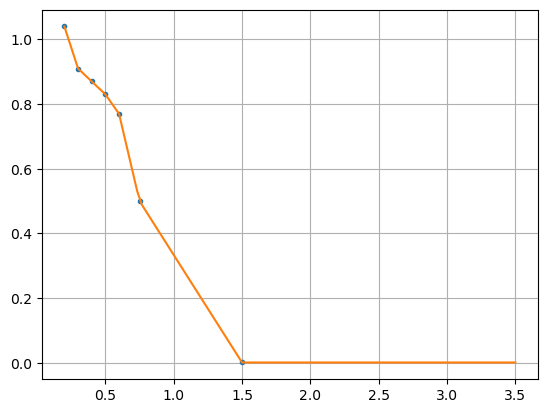

In [7]:

p_data_exp = [0.2, 0.3, 0.4, 0.5, 0.6, 0.75, 1.5]
EavgMB_data = [1.04, 0.91, 0.87, 0.83, 0.77, 0.5, 0.001]
interpolator = sp.interpolate.interp1d(p_data_exp, EavgMB_data, kind='linear', fill_value=0.001, bounds_error=False)


x_test = np.linspace(0.2, 3.5, 100)
y_test = interpolator(x_test)

plt.plot(p_data_exp, EavgMB_data, '.')
plt.plot(x_test, y_test, '-')
plt.grid()